Let's get started by imported libraries and loading the data

In [1]:
import palmerpenguins

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Today we're gonna use the Palmer Penguins data set. It was collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). This dataset was popularized by [Allison Horst](https://www.allisonhorst.com/) in her R package [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/) with the goal to offer an alternative to the iris dataset for data exploration and visualization.

In [2]:
data = palmerpenguins.load_penguins()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Today's goal is to show you **a lot of examples** that show how to customize different aspects of a legend. Hopefully, after reading this post, you will be able to take the pieces you need and build your own custom legend. 

The base plot is going to be a scatterplot of flipper length vs bill length, colored by species.

In [3]:
FLIPPER_LENGTH = data["flipper_length_mm"].values
BILL_LENGTH = data["bill_length_mm"].values

SPECIES = data["species"].values
SPECIES_ = np.unique(SPECIES)

COLORS = ["#1B9E77", "#D95F02", "#7570B3"]

## The default behavior

Let's get started by creating the chart and calling `ax.legend()` to see what is the default behavior.

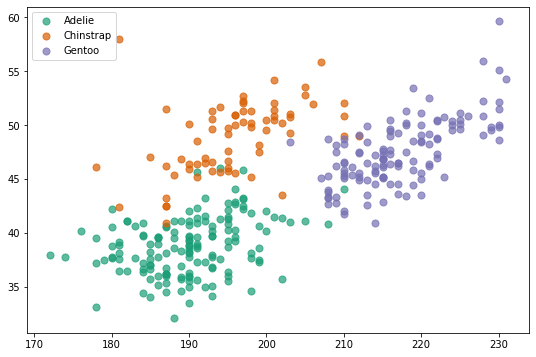

In [4]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
ax.legend();

By default, Matplotlib automatically generates a legend that correctly reflects the colors and labels we passed. Usually, it also places the legend in a good place. But that's not the case here since the legend overlaps with one of the dots.

In addition, Matplotlib also reflects the different markers in the chart:

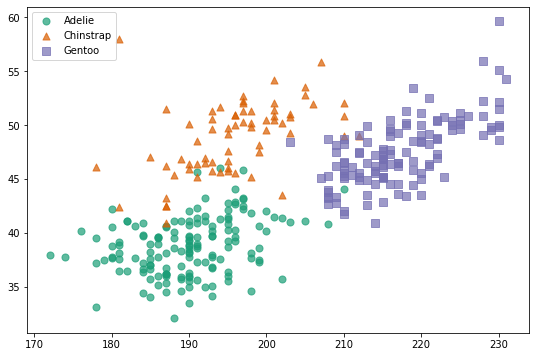

In [5]:
# The markers we use in the scatterplot
MARKERS = ["o", "^", "s"] # circle, triangle, square

fig, ax = plt.subplots(figsize=(9, 6))

for species, color, marker in zip(SPECIES_, COLORS, MARKERS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, marker=marker, alpha=0.7
    )
    
ax.legend();

## Adjust legend position

Let's see a lot of different approaches one can use to position the legend in different places. 

The first thing one can do is pass something to the `loc` argument. This can be either a string in plain English indicating the position of the label, or a number. A complete description of these codes can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) in the documentation for the `loc` argument.

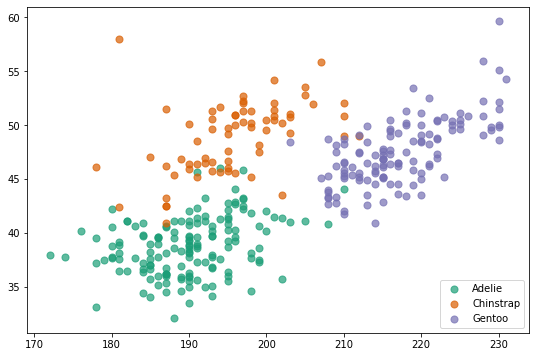

In [6]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Lower right corner is a better place for this legend
ax.legend(loc="lower right");

# The same result with
# ax.legend(loc=4);

It's also possible to take it position the legend outside the plotting region (i.e. out of the the Axis)

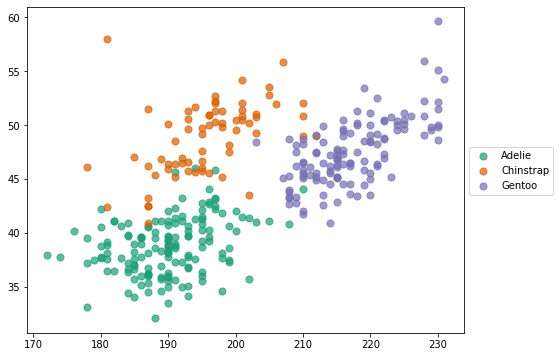

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Let's say we want it on the right side. 
# First, make room on the right side of the figure.
fig.subplots_adjust(right=0.8)


# Add the legend
# Pass `fig.transFigure` as the bounding box transformation 'bbox_transform'
# loc="center left" and bbox_to_anchor=(0.8, 0.5) indicate the left border
# of the legend is placed at 0.8 in the x axis of the figure, and it is
# vertically centered at y = 0.5
ax.legend(
    loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure 

);

One could do the same thing to place the legend on the left side of the plot

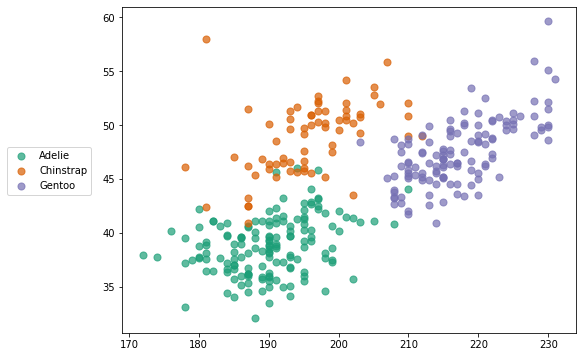

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )


# Make room on the left side of the figure.
fig.subplots_adjust(left=0.2)

# Add the legend
# Now x = 0.16 to leave some space for the axis tick labels
ax.legend(
    loc="center right",
    bbox_to_anchor=(0.16, 0.5),
    bbox_transform=fig.transFigure 
);

Can we have the legend on top/bottom? Of course we can! In this case, it makes much more sense to have the entries one next to each other, so we use `ncol=3` to tell Matplotlib the legend has three columns.

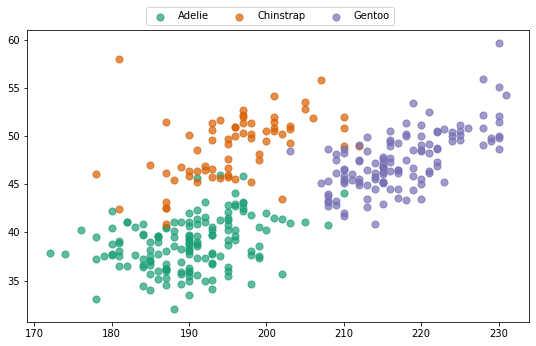

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Make room on top now
fig.subplots_adjust(top=0.8)

ax.legend(
    loc="lower center", # "upper center" puts it below the line
    ncol=3,
    bbox_to_anchor=(0.5, 0.8),
    bbox_transform=fig.transFigure 
);

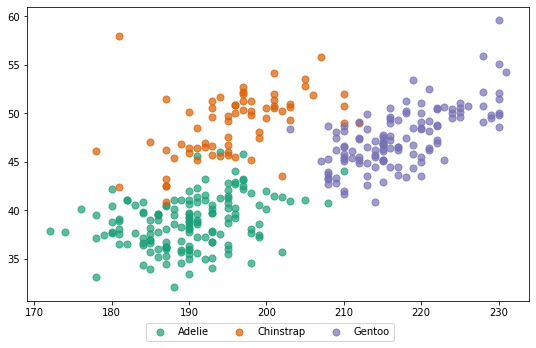

In [10]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Make room on below
fig.subplots_adjust(bottom=0.2)

# Again, leave some extra space for the axis tick labels
ax.legend(
    loc="upper center",
    ncol=3,
    bbox_to_anchor=(0.5, 0.16),
    bbox_transform=fig.transFigure 
);

Is it possible to align the plot to the right or left? Sure!

One difference with the plots above, is that here we don't use `bbox_transform=fig.transFigure`. If we want to align the boundary of the legend with the boundary of the axis, it's easier to use the default which is the axis. Note the value `1.05`. It means the legend is 5% of the height of the axis above its top boundary.

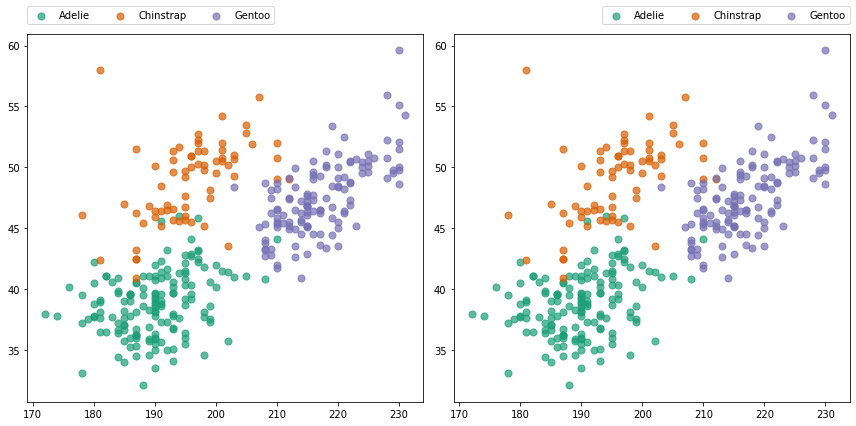

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    axes[0].scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
    axes[1].scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# borderaxespad = 0 means there's no padding between the border
# of the legend and the axis
axes[0].legend(
    loc="center left", 
    ncol=3,
    bbox_to_anchor=[0, 1.05],
    borderaxespad=0,
)

axes[1].legend(
    loc="center right", 
    ncol=3,
    bbox_to_anchor=[1, 1.05],
    borderaxespad=0,
);

## Customize labels

One can store the object returned by `ax.legend()` and do lot of interesting things with it.

The legend returned has a method `.get_texts()` that return a list of `matplotlib.text.Text` objects. These objects have **a lot** of methods one can use to customize the appearence of the text.

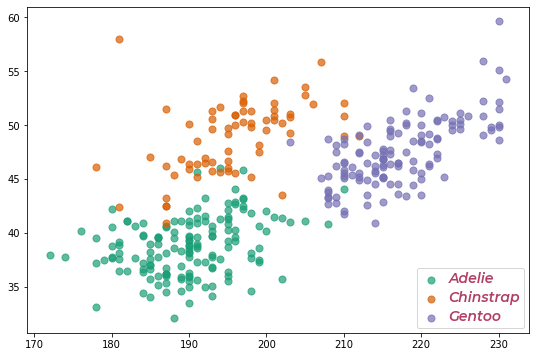

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
legend = ax.legend(loc="lower right")

# Iterate over texts.
# Method names are quite self-describing
for text in legend.get_texts():
    text.set_fontfamily("Montserrat")
    text.set_color("#b13f64")
    text.set_fontstyle("italic")
    text.set_fontweight("bold")
    text.set_fontsize(14)

Let's see another example with more tweaks:

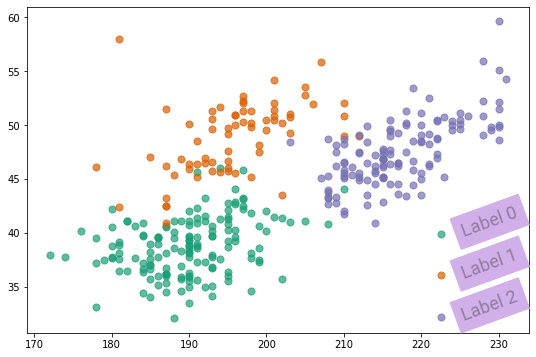

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
legend = ax.legend(loc="lower right", frameon=False)

for i, text in enumerate(legend.get_texts()):
    text.set_fontfamily("Roboto")
    text.set_rotation(20)
    text.set_text(f"Label {i}")
    text.set_backgroundcolor("#d1afe8")
    text.set_fontsize(18)
    text.set_alpha(0.3)

So many things can be customized! 

If you're interested in doing some research on your own, you can always call `dir(text)` to see what are the attributes and methods of the `text` object.

## Customize the title

So far, the legend does not have a title. Let's add one and customize some of its attributes:

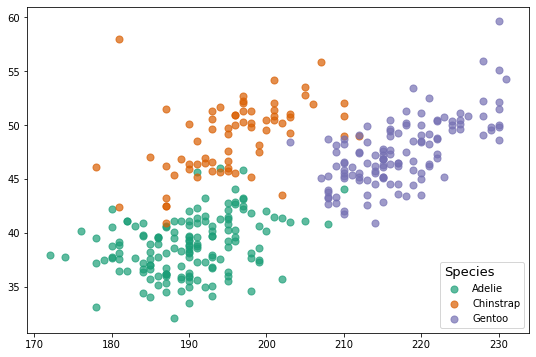

In [14]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Add a title
legend = ax.legend(
    title="Species", 
    loc="lower right", 
    title_fontsize=13
)

# Align it to the left ("right" is also possible)
legend._legend_box.align = "left"

Let's push a little further:

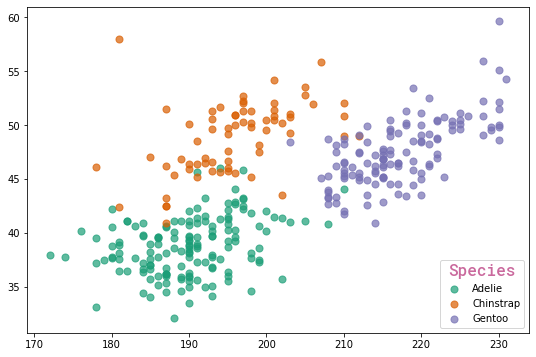

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Legend without title
legend = ax.legend(loc="lower right")

# Set title manually. Just specify the text.
legend.set_title("Species")

# Object of class 'matplotlib.text.Text'. 
# We can use any of the methods we have used for the label texts above.
title = legend.get_title()
title.set_color("#ca699d")
title.set_family("Roboto Mono")
title.set_weight("bold")
title.set_size(16)

And even further?!

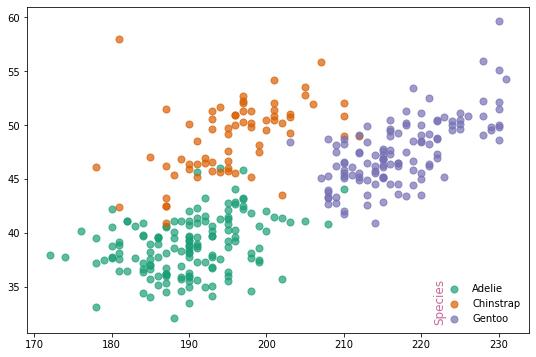

In [16]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Legend without title
legend = ax.legend(loc="lower right", frameon=False)

# Set title manually. Just specify the text.
legend.set_title("Species")

# It's possible to move the title to arbitrary positions with
# .set_x() and .set_y()... but play with caution!
title = legend.get_title()
title.set_color("#ca699d")
title.set_size(12)
title.set_x(-42)
title.set_y(-46)
title.set_rotation(90)

## Customize the handles

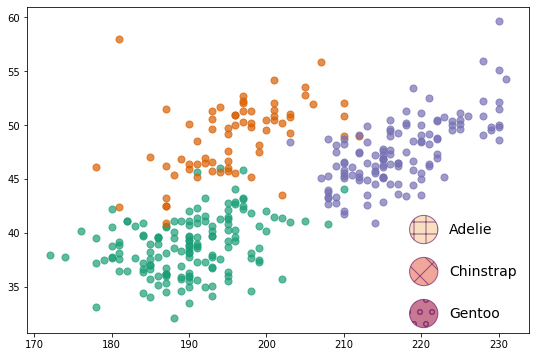

In [17]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

legend = ax.legend(loc="lower right", fontsize=14, markerscale=4, labelspacing=2, frameon=False)
handles = legend.legendHandles

# There are many more hatches available in matplotlib
hatches = ["+", "x", "o"]
colors = ["#f6d2a9", "#ea8171", "#b13f64"]

for i, handle in enumerate(handles):
    handle.set_edgecolor("#6c2167") # set_edgecolors
    handle.set_facecolor(colors[i])
    handle.set_hatch(hatches[i])
    handle.set_alpha(0.7)

## Customize the layout

Some relevant argument names and their meaning:

* `borderaxespad`: The pad between the axes and legend border, in font-size units.
* `borderpad`: The fractional whitespace inside the legend border, in font-size units.
* `columnspacing`: The spacing between columns, in font-size units.
* `handlelength`: The length of the legend handles, in font-size units.
* `handletextpad`: The pad between the legend handle and text, in font-size units.
* `labelspacing`: The vertical space between the legend entries, in font-size units.
* `markerscale`: The relative size of legend markers compared with the originally drawn ones.

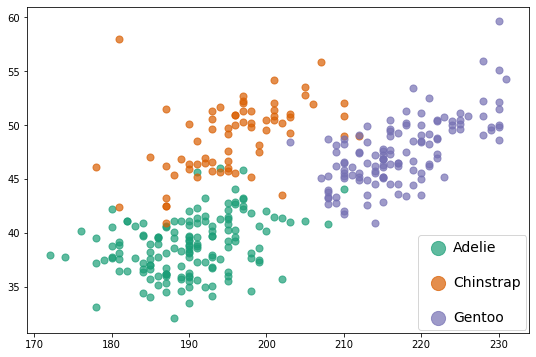

In [18]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

legend = ax.legend(
    loc="lower right", 
    fontsize=14, 
    borderaxespad=0.2, # Legend closer to the border
    handletextpad=0.1, # Distance between circle and label is smaller
    labelspacing=1.5,  # Vertical space between labels
    markerscale=2,     # The size of the dots is twice as large.
)

Let's use a 3-column layout and customize the space between the columns:

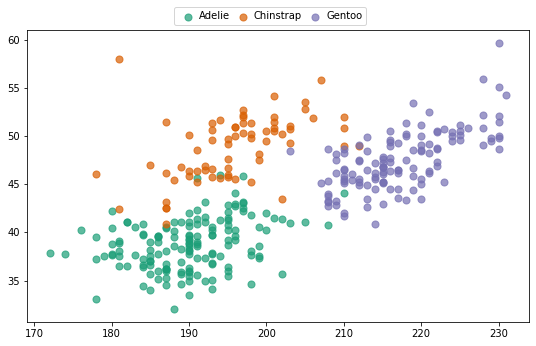

In [19]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )

# Make room on top now
fig.subplots_adjust(top=0.8)

ax.legend(
    loc="lower center",
    ncol=3,
    bbox_to_anchor=(0.5, 0.8),
    bbox_transform=fig.transFigure,
    handletextpad=0.1,
    columnspacing=0.3
);

And finally, an example customizing several aspects at the same time:

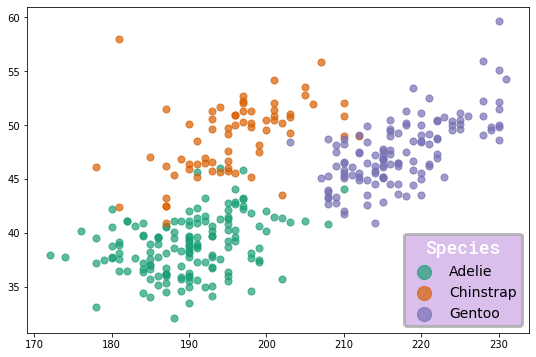

In [20]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
legend = ax.legend(loc="lower right", fontsize=14, markerscale=2)

# Let's only pass the text here
legend.set_title("Species")

# Object of class 'matplotlib.text.Text'. We can use any of the methods
# we have used for the label texts above.
title = legend.get_title()
title.set_color("white")
title.set_family("Roboto Mono")
title.set_weight("bold")
title.set_size(18)

# Customize legend patch
legend.legendPatch.set_facecolor("#d1afe8")
legend.legendPatch.set_edgecolor("#a9a9a9")
legend.legendPatch.set_linewidth(3)

## Where to go next? Some real examples

Wouldn't it be really cool to see how these things are used in real-life examples? Of course it would! The following is a list of highly customized visualizations made in Matplotlib that contain beautiful legends made with the tricks shown above. Have a look!

* [Circular barplot with Matplotlib](https://www.python-graph-gallery.com/web-circular-barplot-with-matplotlib): Actually not a legend, but a colorbar with discrete scales that looks very cool.
* [Radar chart with Matplotlib](https://www.python-graph-gallery.com/web-radar-chart-with-matplotlib): Shows how to manually overlay lines and dots in the same handle.
* [Chris Claremont's X-Men comics exploration with streamcharts in Matplotlib](https://www.python-graph-gallery.com/web-streamchart-with-matplotlib): One of the most beautiful charts in this collection. Shows how to position a legend in a visualization with multiple panels and customize several aspects.
* [Mario Kart 64 World Records with Python and Matplotlib](https://www.python-graph-gallery.com/web-lollipop-plot-with-python-mario-kart-64-world-records): Showcases how to put both a legend and a colormap.
* [The Office Ratings with Python and Matplotlib](https://www.python-graph-gallery.com/web-lollipop-plot-with-python-the-office): Shows how to mimic a legend from scratch when built-in functions aren't enough.
* [Time series with filled area and custom facetting in Matplotlib](https://www.python-graph-gallery.com/web-time-series-and-facetting-with-matplotlib): Shows how to create a legend with both lines and patches and how to place it in an arbitrary position in a visualization with multiple panels.